#                       PROJECT WINE  - Shyla - 10/26/2019

## Link to Dataset
# https://archive.ics.uci.edu/ml/datasets/Wine+Quality

In [671]:
#################################################################################
#
#                             BRIEF SUMMARY
#
# The Project Wine Jupyter Book has 12 Steps which are described below:
#
# 1. Reads both files winequality-red and winequality-white, gives them an name.
#    Nomenclaure used for the wines is WW# for White Wines and RW# for Red Wines
# 2. Creates Lists for various columns in Red wines file and White Wines file.
#    Get Quality counts for red and white wines. 
# 3. 2D Scatter and Line Plots
# 4. 3D Scatter plots
# 5. Box Plot
# 6. Histogram Plot
# 7. Bar Plot
# 8. Horizontal Bar Plot
# 9. Pie Chart
# 10. Mean, Median, Mode, Standard Deviation
# 11. Frequency distribution and plotting 1,2,3 Sigma on a bar chart
# 12. Sampling Wine Quality and plotting Mean, 1-Sigma for various sample sizes
#
#################################################################################

## Step 1: Read files for White & Red and convert into lists

In [1]:
# Import required Python packages
#

import random
import statistics as stats
import matplotlib.pyplot as plt
%matplotlib notebook

from matplotlib import interactive
interactive(True)


In [874]:
# STEP 1: Reads Red and White Wine Quality files and creates 4 lists

def read_file_RWWW(filename1, filename2):
    print("STEP 1: read_file_RWWW does the following:", '\n',
    '\t','\t', "a) Reads Red and White Wine Quality File  ", '\n',
    '\t','\t', "b) Converts them into two separate arrays", '\n',
    '\t','\t', "c) Creates a merged array of Red and Whites", '\n')
    file1_open = open(filename1,"r")
    data_array1 = []
    x = 0
    y = 0
    s1 = "RW"
    s2 = "WW"
    file2_open = open(filename2,"r")
    data_array2 = []
    print('\t','\t', "Reading Red Wines Quality file", '\n')
    for line1 in iter(file1_open):
        line1_no_newline = line1.rstrip()
        line1_split = line1_no_newline.split(";")
        name1 = s1 + str(x)
        line1_split.append(name1)
        data_array1.append(line1_split)
        x += 1
    file1_open.close()
    print('\t','\t', "Red Wines file read (rw) COMPLETED", '\n' )
    print('\t','\t', "There are ", len(data_array1), " items in Red Wines", '\n' )
    print('\t','\t', "Reading White Wines Quality file", '\n' )
    for line2 in iter(file2_open):
        line2_no_newline = line2.rstrip()
        line2_split = line2_no_newline.split(";")
        name2 = s2 + str(y)
        line2_split.append(name2)
        data_array2.append(line2_split)
        y += 1
    file2_open.close()
    print('\t','\t', "White Wines file read (ww) COMPLETED", '\n' )
    print('\t','\t', "There are ", len(data_array2), " items in White Wines", '\n' )
    print('\t','\t', "Creating Merged Red and White Wine list, (wine2) as TWO Lists [Red] and [White]", '\n' )
    data_array = []
    data_array.append(data_array1)
    data_array.append(data_array2)
    print('\t','\t', "Wine List as TWO Lists (wine2) COMPLETED ", '\n' )
    print('\t','\t', "There are ", len(data_array), " items in Wines", '\n' )
    print('\t','\t', "Creating Merged Red and White Wine list (winel) as ONE List [All Reds, All Whites]", '\n' )
    data = []
    tmp1 = data_array1
    tmp2 = data_array2
    head1 = tmp1.pop(0)
    head2 = tmp2.pop(0)               # Ignore heading of WW List
    for index1 in tmp1:
        data.append(index1)
    for index2 in tmp2:
        data.append(index2)
    print('\t','\t', "There are ", len(data), " items in ALL Red and Whites as ONE List, (winel), COMPLETED")
    return data_array1, data_array2, data_array, data
#    return data_array1, data_array2

rw, ww, wine2, winel = read_file_RWWW("winequality-red.csv", "winequality-white.csv")
#rw, ww = read_file_RWWW("winequality-red.csv", "winequality-white.csv")

# ## Step 1: Read files for White & Red and convert into lists
# print("winel =", winel[0:5])

STEP 1: read_file_RWWW does the following: 
 	 	 a) Reads Red and White Wine Quality File   
 	 	 b) Converts them into two separate arrays 
 	 	 c) Creates a merged array of Red and Whites 

	 	 Reading Red Wines Quality file 

	 	 Red Wines file read (rw) COMPLETED 

	 	 There are  1600  items in Red Wines 

	 	 Reading White Wines Quality file 

	 	 White Wines file read (ww) COMPLETED 

	 	 There are  4899  items in White Wines 

	 	 Creating Merged Red and White Wine list, (wine2) as TWO Lists [Red] and [White] 

	 	 Wine List as TWO Lists (wine2) COMPLETED  

	 	 There are  2  items in Wines 

	 	 Creating Merged Red and White Wine list (winel) as ONE List [All Reds, All Whites] 

	 	 There are  6497  items in ALL Red and Whites as ONE List, (winel), COMPLETED


## Step 2a: Get Quality Counts for Reds and Whites

In [648]:
# Next create individual lists for Red and White Q factors

def make_list(lst, itemNo):
    q = []
    for i in lst:
        q.append(i[itemNo])
    return q

def make_listf(lst, itemNo):
    q = []
    fl = []
    for i in lst:
        q.append(i[itemNo])
    fl = make_float(q)
    return fl 

def make_listi(lsti, itemNoi):
    qi = []
    integer_list = []
    for i in lsti:
        qi.append(i[itemNoi])
    integer_list = make_int(qi)
    return integer_list 

def make_float(lis):
    qf = []
    for i in lis:
        qf.append(float(i))
    return qf 

def make_int(lisi):
    qi = []
    for i in lisi:
        qi.append(int(i))
    return qi 

def get_count(alist):
    c1 = alist.count('1')
    c2 = alist.count('2')
    c3 = alist.count('3')
    c4 = alist.count('4')
    c5 = alist.count('5')
    c6 = alist.count('6')
    c7 = alist.count('7')
    c8 = alist.count('8')
    c9 = alist.count('9')
    c10 = alist.count('10')

    cnt_list = []
    
    cnt_list.append(c1)
    cnt_list.append(c2)
    cnt_list.append(c3)
    cnt_list.append(c4)
    cnt_list.append(c5)
    cnt_list.append(c6)
    cnt_list.append(c7)
    cnt_list.append(c8)
    cnt_list.append(c9)
    cnt_list.append(c10)
    return cnt_list

q_cnt = [1,2,3,4,5,6,7,8,9,10]
rwQ = make_list(rw, 11)
rwQltyCnt = get_count(rwQ)
wwQ = make_list(ww, 11)
wwQltyCnt = get_count(wwQ)

rwQi = make_int(rwQ)
wwQi = make_int(wwQ)

#print(type(rwQ[0]), rwQ[0])
print("Red Wine Quality Count List [1:10] =", rwQltyCnt)
print("White Wine Quality Count List [1:10] =", wwQltyCnt)
print("Red and White Wine Quality Count =", len(rwQ), ",", len(wwQ), "respectively")

Red Wine Quality Count List [1:10] = [0, 0, 10, 53, 681, 638, 199, 18, 0, 0]
White Wine Quality Count List [1:10] = [0, 0, 20, 163, 1457, 2198, 880, 175, 5, 0]
Red and White Wine Quality Count = 1599 , 4898 respectively


## Step 2b: 
## Create Lists for all headings of Reds and Whites for future use

In [562]:
# Next create Lists for following parameters for Reds and Whites
# 0) Fixed Acidity        : FA (Mainly fixed acids  are tartaric, malic, citric,(grapes) and succinic(yeast))
# 1) Volatile Acidity     : VA (Volatile acidity is primarily caused by bacteria in the wine creating acetic acid)
# 2) Citric Acid          : CA (C6H8O7 - from grapes, namely absorbic acid)
# 3) Residual Sugar       : RS (Sugars left over from grapes that ends up in wine after fermentation)
# 4) Chlorides            : C
# 5) Free Sulfur Dioxide  : FSO2 (SO2 compounds are sulphites which some folks are allergic to)
# 6) Total Sulfur Dioxide : TSO2
# 7) Density              : D
# 8) pH                   : pH
# 9) Sulphates            : SO4
# 10) Alcohol             : A
# 11) Quality             : Qlty

# Red and White 0) Fixed Acidity        : FA
rwFA = make_listf(rw, 0)
wwFA = make_listf(ww, 0)
print("Created FA lists for Reds and Whites")

# Red and White 1) Volatile Acidity     : VA
rwVA = make_listf(rw, 1)
wwVA = make_listf(ww, 1)
print("Created VA lists for Reds and Whites")

# Red and White 2) Citric Acid     : CA
rwCA = make_listf(rw, 2)
wwCA = make_listf(ww, 2)
print("Created CA lists for Reds and Whites")

# Red and White 3) Residual Sugar       : RS
rwRS = make_listf(rw, 3)
wwRS = make_listf(ww, 3)
print("Created RS lists for Reds and Whites")

# Red and White 4) Chlorides     : C
rwC = make_listf(rw, 4)
wwC = make_listf(ww, 4)
print("Created C lists for Reds and Whites")

# Red and White 5) Free Sulfur Dioxide     : FSO2
rwFSO2 = make_listf(rw, 5)
wwFSO2 = make_listf(ww, 5)
print("Created FSO4 lists for Reds and Whites")

# Red and White 6) Total Sulfur Dioxide     : TSO2
rwTSO2 = make_listf(rw, 6)
wwTSO2 = make_listf(ww, 6)
print("Created TSO4 lists for Reds and Whites")

# Red and White 7) Density     : D
rwD = make_listf(rw, 7)
wwD = make_listf(ww, 7)
print("Created D lists for Reds and Whites")

# Red and White 8) PH       : PH
rwPH = make_listf(rw, 8)
wwPH = make_listf(ww, 8)
print("Created pH lists for Reds and Whites")

# Red and White 9) Sulphates     : SO4
rwSO4 = make_listf(rw, 9)
wwSO4 = make_listf(ww, 9)
print("Created SO4 lists for Reds and Whites")

# Red and White 10) Alcohol     : A
rwA = make_listf(rw, 10)
wwA = make_listf(ww, 10)
print("Created A lists for Reds and Whites")

# Red and White 12) Number     : N
rwN = make_list(rw, 12)
wwN = make_list(ww, 12)
print("Created N lists for Reds and Whites")

Created FA lists for Reds and Whites
Created VA lists for Reds and Whites
Created CA lists for Reds and Whites
Created RS lists for Reds and Whites
Created C lists for Reds and Whites
Created FSO4 lists for Reds and Whites
Created TSO4 lists for Reds and Whites
Created D lists for Reds and Whites
Created pH lists for Reds and Whites
Created SO4 lists for Reds and Whites
Created A lists for Reds and Whites
Created N lists for Reds and Whites


## Step 3: 2D PLOTS
##  Step 3a: 2D SCATTER Plots: Quality Vs. Count in Reds and Whites  

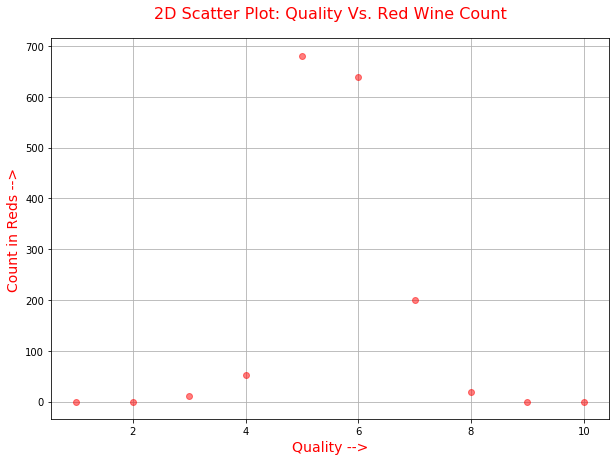

In [836]:
plt.figure(figsize = (10,7))
plt.plot(q_cnt, rwQltyCnt,'ro', alpha=0.5)
plt.xlabel("Quality -->", fontsize = 14, color ='r')
plt.ylabel("Count in Reds -->", fontsize = 14, color ='r')
plt.title("2D Scatter Plot: Quality Vs. Red Wine Count", fontsize = 16, color ='r', pad = 20)
plt.grid()
plt.show()

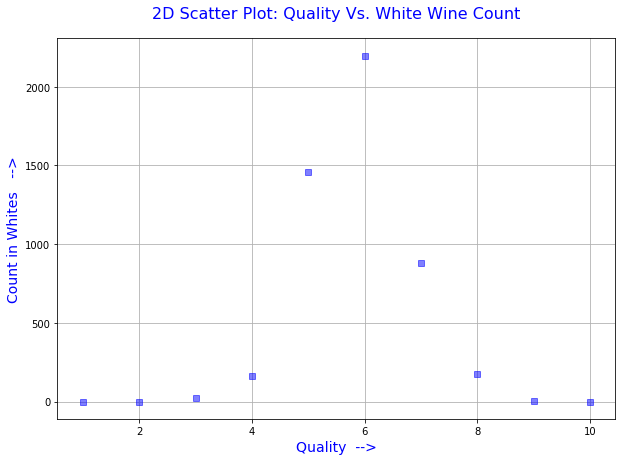

In [848]:
plt.figure(figsize = (10,7))
plt.plot(q_cnt, wwQltyCnt,'bs', alpha=0.5)
plt.xlabel("Quality  -->", fontsize = 14, color ='b')
plt.ylabel("Count in Whites   -->", fontsize = 14, color ='b')
plt.title("2D Scatter Plot: Quality Vs. White Wine Count", fontsize = 16, color ='b', pad = 20)
plt.grid()
plt.show()

## Step 3b:  2D LINE Plot: Quality Vs. Counts in Reds and Whites

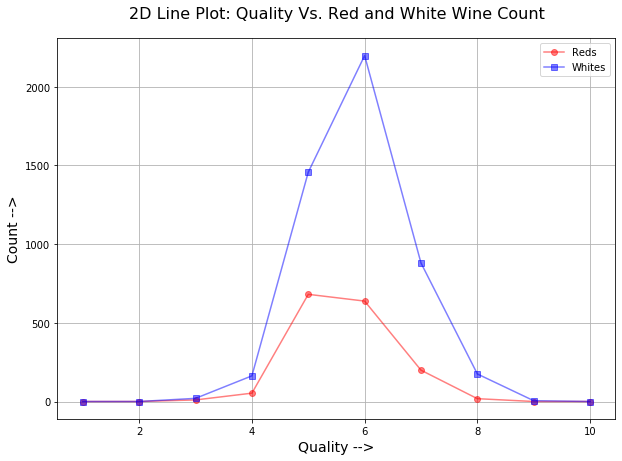

In [849]:
plt.figure(figsize = (10,7))
plt.plot(q_cnt, rwQltyCnt,'-ro', label='Reds', alpha=0.5)
plt.plot(q_cnt, wwQltyCnt,'-bs', label = 'Whites', alpha=0.5)
plt.xlabel("Quality -->", fontsize = 14, color ='k')
plt.ylabel("Count -->", fontsize = 14, color ='k')
plt.title("2D Line Plot: Quality Vs. Red and White Wine Count", fontsize = 16, color ='k', pad = 20)
plt.legend()
plt.grid()
plt.show()

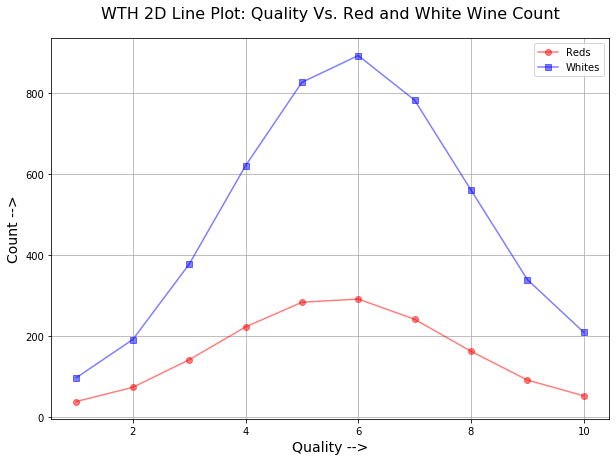

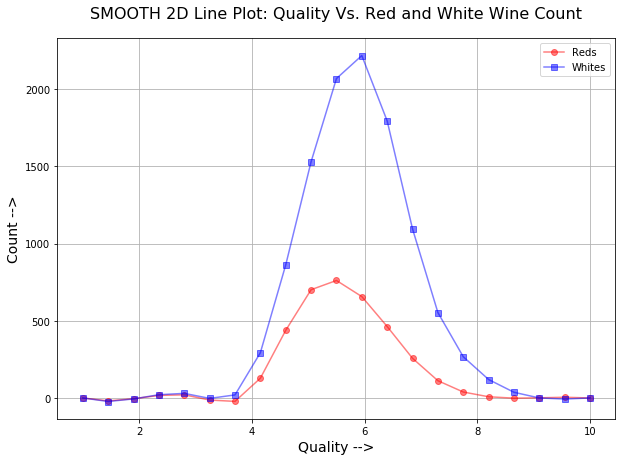

In [871]:
# THIS IS FOR ME ONLY, NOT PART OF PROJECT: Create a smooth  plot

# THIS METHOD DOES NOT WORK WELL - SEE PLOT BELOW FOR COUNT OF 10 and 1

from scipy.ndimage.filters import gaussian_filter1d

rwQltyCnt_smooth = gaussian_filter1d(rwQltyCnt, sigma=2)
wwQltyCnt_smooth = gaussian_filter1d(wwQltyCnt, sigma=2)

plt.figure(figsize = (10,7))
plt.plot(q_cnt, rwQltyCnt_smooth,'-ro', label='Reds', alpha=0.5)
plt.plot(q_cnt, wwQltyCnt_smooth,'-bs', label = 'Whites', alpha=0.5)
plt.xlabel("Quality -->", fontsize = 14, color ='k')
plt.ylabel("Count -->", fontsize = 14, color ='k')
plt.title("WTH 2D Line Plot: Quality Vs. Red and White Wine Count", fontsize = 16, color ='k', pad = 20)
plt.legend()
plt.grid()
plt.show()
plt.close()

# ANOTHER METHOD - BETTER, but values at the tails is not captured correctly
from scipy.interpolate import interp1d
import numpy  as np

f2 = interp1d(q_cnt, rwQltyCnt, kind='cubic')
f3 = interp1d(q_cnt, wwQltyCnt, kind='cubic')
q_cnt_new = np.linspace(1, 10, num=21, endpoint=True)

plt.figure(figsize = (10,7))
plt.plot(q_cnt_new, f2(q_cnt_new),'-ro', label='Reds', alpha=0.5)
plt.plot(q_cnt_new, f3(q_cnt_new),'-bs', label = 'Whites', alpha=0.5)
plt.xlabel("Quality -->", fontsize = 14, color ='k')
plt.ylabel("Count -->", fontsize = 14, color ='k')
plt.title("SMOOTH 2D Line Plot: Quality Vs. Red and White Wine Count", fontsize = 16, color ='k', pad = 20)
plt.legend()
plt.grid()
plt.show()

## Step 3c:  2D Scatter Plot: pH Vs. Fixed Acidity in Reds and Whites

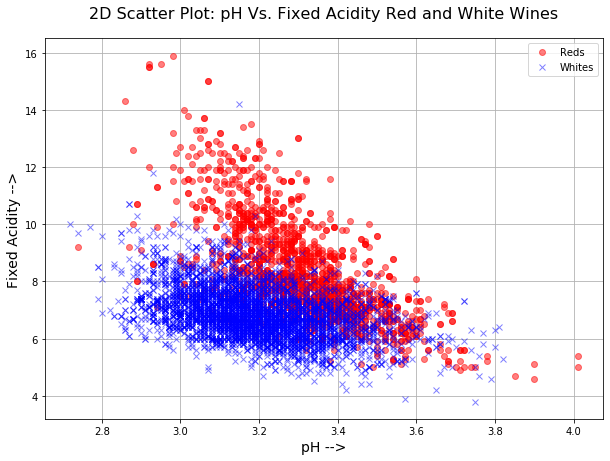

In [875]:
# FA, VA, CA, RS, C, FSO4, TSO4, D, PH, SO4, A, Q, N
plt.figure(figsize = (10,7))
plt.plot(rwPH, rwFA,'ro', label='Reds', alpha=0.5)
plt.plot(wwPH, wwFA,'bx', label = 'Whites', alpha=0.5)
plt.xlabel("pH -->", fontsize = 14, color ='k')
plt.ylabel("Fixed Acidity -->", fontsize = 14, color ='k')
plt.title("2D Scatter Plot: pH Vs. Fixed Acidity Red and White Wines", fontsize = 16, color ='k', pad = 20)
plt.legend()
plt.grid()
plt.show()

## Step 4:  3D Scatter Plot: Sulphur Compounds in Reds and Whites

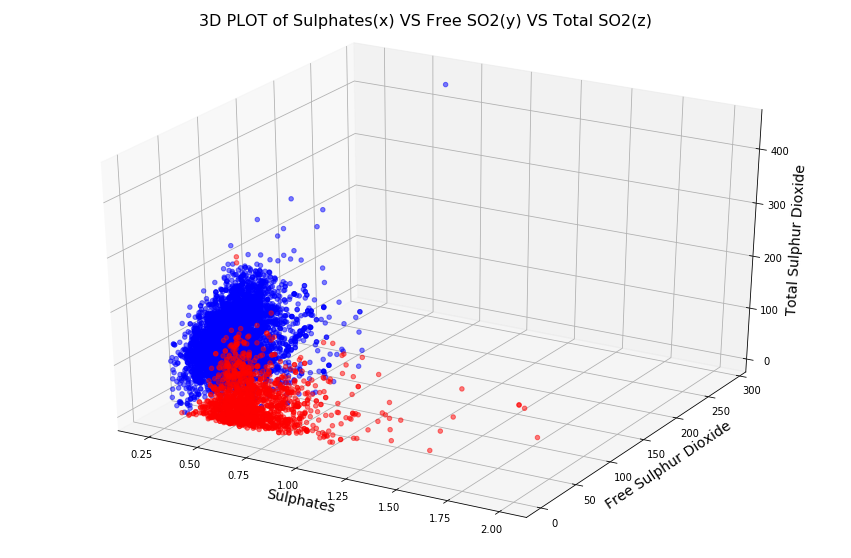

In [912]:
# FA, VA, CA, RS, C, FSO2, TSO2, D, PH, SO4, A, Q, N
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(rwSO4, rwFSO2, rwTSO2, color='r', alpha=0.5)
ax.scatter(wwSO4, wwFSO2, wwTSO2, color='b', alpha=0.5)
ax.set_title("3D PLOT of Sulphates(x) VS Free SO2(y) VS Total SO2(z)", fontsize = 16, pad=25)

ax.set_xlabel('Sulphates', fontsize=14)
ax.set_ylabel('Free Sulphur Dioxide', fontsize=14)
ax.set_zlabel('Total Sulphur Dioxide', fontsize=14)
# ax.set_xlim(left=0, right=1.0)
# ax.set_ylim(bottom=0, top=200)
# ax.set_zlim(bottom=0, top=150)
plt.show()
#plt.legend()
#plt.grid()
plt.show()

## Step 5:  BOX Plot: Citric Acid in Reds and Whites

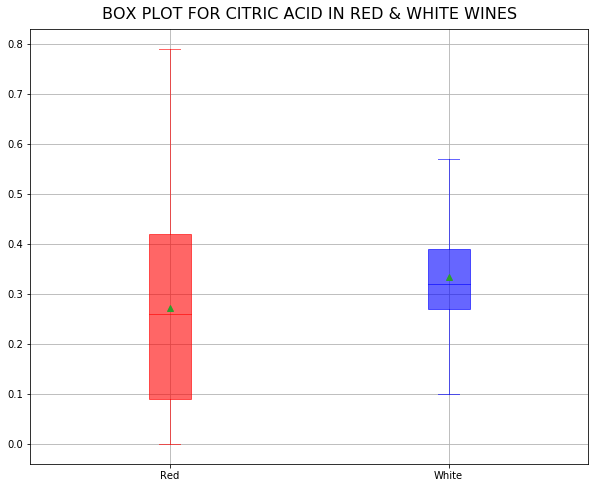

In [708]:
# FA, VA, CA, RS, C, FSO2, TSO2, D, PH, SO4, A, Q, N

import matplotlib.pyplot as plt

def color_boxplot(data, color, pos=[0], ax=None):
    ax = ax or plt.gca()
    bp = ax.boxplot(data, 0, '', patch_artist=True,  showmeans=True, positions=pos)
    for item in ['boxes', 'whiskers', 'fliers', 'medians', 'caps']:
        plt.setp(bp[item], color=color, alpha=0.6)
        
value1 = rwCA
value2 = wwCA
fig, ax = plt.subplots(figsize=(10,8))
bp1 = color_boxplot(value1, 'r', [1])
bp2 = color_boxplot(value2, 'b', [2])
plt.title("BOX PLOT FOR CITRIC ACID IN RED & WHITE WINES", fontsize = 16, pad = 10)

ax.set(xticks=[1,2], xticklabels=["Red","White"])
plt.grid()
plt.show()
plt.close()

## Step 6:  HISTOGRAM: Quality in Reds and Whites

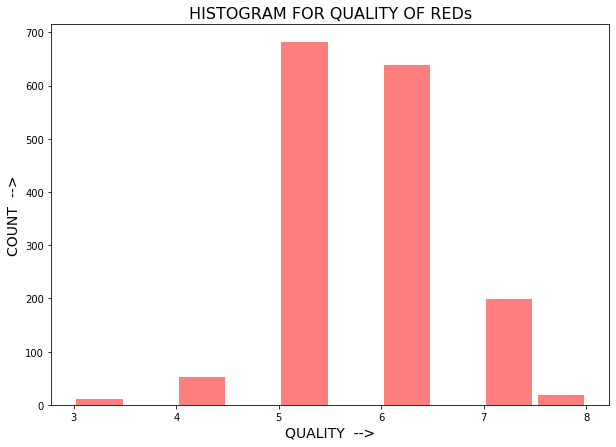

In [697]:
# FA, VA, CA, RS, C, FSO2, TSO2, D, PH, SO4, A, Q, N

#plt.hist(rwQi, bins=10, alpha=0.9, edgecolor='b', rwidth=0.9) # takes a list
#plt.hist(rwQi)
plt.figure(figsize=(10,7))
plt.hist(rwQi, color='r', alpha=0.5, rwidth = 0.9) # takes a list

plt.title("HISTOGRAM FOR QUALITY OF REDs", fontsize = 16, color='k')
plt.xlabel("QUALITY  -->", fontsize = 14, color='k')
plt.ylabel("COUNT  -->", fontsize = 14, color='k')
plt.show()
plt.close()

# LAST BIN IS RIGHT ALIGNED. THIS IS A BUG IN plt.hist? OK in plt.bar.
# ANYONE KNOW HOW TO FIX IT? NOT AN ISSUE IN NUMPY AS I UNDERSTAND.

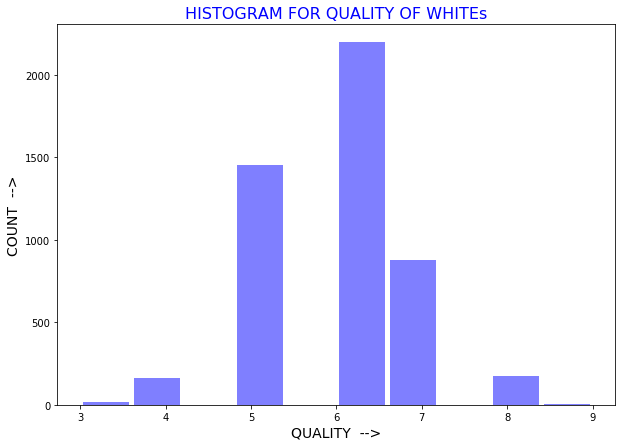

In [710]:
# FA, VA, CA, RS, C, FSO2, TSO2, D, PH, SO4, A, Q, N

#plt.hist(rwQi, bins=10, alpha=0.9, edgecolor='b', rwidth=0.9) # takes a list
#plt.hist(rwQi)
plt.figure(figsize=(10, 7))
plt.hist(wwQi, color='b', alpha=0.5, rwidth=0.9) # takes a list

plt.title("HISTOGRAM FOR QUALITY OF WHITEs", fontsize = 16, color='b')
plt.xlabel("QUALITY  -->", fontsize = 14, color='k')
plt.ylabel("COUNT  -->", fontsize = 14, color='k')
plt.show()
plt.close()

# BINs NOT ALIGNED. THIS IS A BUG IN plt.hist? OK in plt.bar.
# ANYONE KNOW HOW TO FIX IT? NOT AN ISSUE IN NUMPY AS I UNDERSTAND.

## Step 7:  BAR Plot: Quality in Reds and Whites

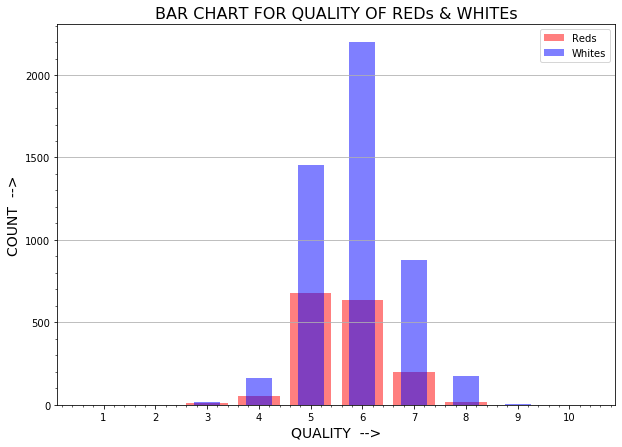

In [704]:
# FA, VA, CA, RS, C, FSO2, TSO2, D, PH, SO4, A, Q, N

x1, y1 = q_cnt, rwQltyCnt
x2, y2 = x1, wwQltyCnt

fig, ax = plt.subplots(figsize=(10,7))
ax.bar(x1, y1, color='r', alpha=0.5, label = 'Reds') # takes a list
ax.bar(x2, y2, color='b', alpha=0.5, width=0.5, label='Whites') # takes a list
ax.set_xticklabels(q_cnt)
ax.set_xticks(q_cnt)
ax.minorticks_on()

plt.title("BAR CHART FOR QUALITY OF REDs & WHITEs", fontsize = 16, color='k')
plt.xlabel("QUALITY  -->", fontsize = 14, color='k')
plt.ylabel("COUNT  -->", fontsize = 14, color='k')
plt.legend()
plt.grid(axis='y')
plt.show()


## Step 8a:  Horizontal Bar Chart: Top 25 Quality Wines

Number of Reds in top 500 by Quality rating = 18
Number of Whites in top 500 by Quality rating = 7
[18, 7]


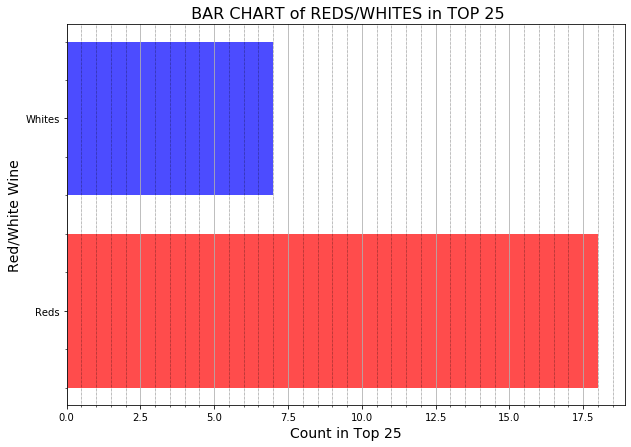

[1599, 4898]


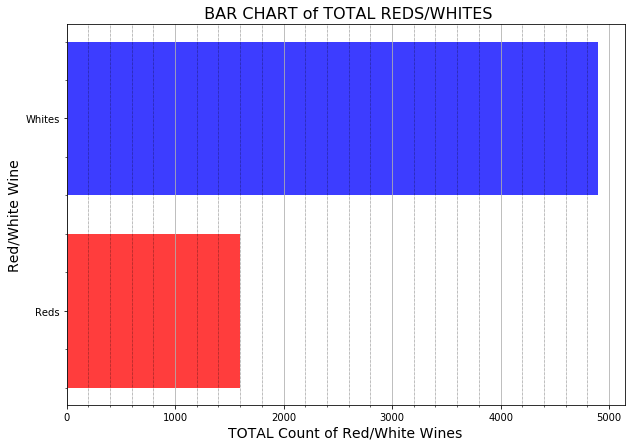

In [896]:
# Take all Reds and Whites and pick the top 500 wines and determine 
# the % of reds and whites in the top 500.(After Quality, FA has priority)

# FA, VA, CA, RS, C, FSO2, TSO2, D, PH, SO4, A, Q, N

from operator import itemgetter

#winels = sorted(winel, key=itemgetter(11))

def get_top_xx(lst, index, Num):
    tmp_lst_sorted_by_index = sorted(winel, key=itemgetter(index), reverse=True)
    Q_topxx = []
    count = 0
    short_list = []
    for line in tmp_lst_sorted_by_index:
        tmp_lst = line
        Qtmp = tmp_lst[11]
        Ntmp = tmp_lst[12]
        tmp_lst = [Qtmp, Ntmp]
        Q_topxx.append(tmp_lst)
        count += 1
        if count == Num:
            return Q_topxx

def sort_xx(lst_xx):
    r = []
    w = []
    for l in lst_xx:
        if "RW" in l[1]:
            r.append(l)
        if "WW" in l[1]:
            w.append(l)
    print("Number of Reds in top 500 by Quality rating =", len(r))
    print("Number of Whites in top 500 by Quality rating =", len(w))
    return r, w

xnum = 25
top_xx = get_top_xx(winel, 11, xnum)
rxx, wxx = sort_xx(top_xx)

t_xx = [len(rxx), len(wxx)]
print(t_xx)
nam = ["Reds", "Whites"]

############### BELOW PLOTS REDS and WHITES IN TOP 500 ##########

my_colors = 'rb'
fig, ax = plt.subplots(figsize=(10,7))
plt.title(" BAR CHART of REDS/WHITES in TOP 25", fontsize=16)
plt.xlabel("Count in Top 25", fontsize=14)
plt.ylabel("Red/White Wine", fontsize=14)
ax.barh(nam, t_xx, color = my_colors, alpha=0.7)
ax.grid(axis='x')
ax.minorticks_on()
ax.grid(axis='x', which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()
plt.close()

############### BELOW PLOTS TOTAL REDS and WHITES ##########

tot_rw = [len(rw), len(ww)]
print(tot_rw)
nam = ["Reds", "Whites"]
my_colors = 'rb'
fig, ax = plt.subplots(figsize=(10,7))
plt.title(" BAR CHART of TOTAL REDS/WHITES", fontsize=16)
plt.xlabel("TOTAL Count of Red/White Wines", fontsize=14)
plt.ylabel("Red/White Wine", fontsize=14)
ax.barh(nam, tot_rw, color = my_colors, alpha=0.76)
ax.grid(axis='x')
ax.minorticks_on()
ax.grid(axis='x', which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()
plt.close()


## Step 8b:  Horizontal Bar Chart: Top 500 Quality Wines

Number of Reds in top 500 by Quality rating = 217
Number of Whites in top 500 by Quality rating = 283
[217, 283]


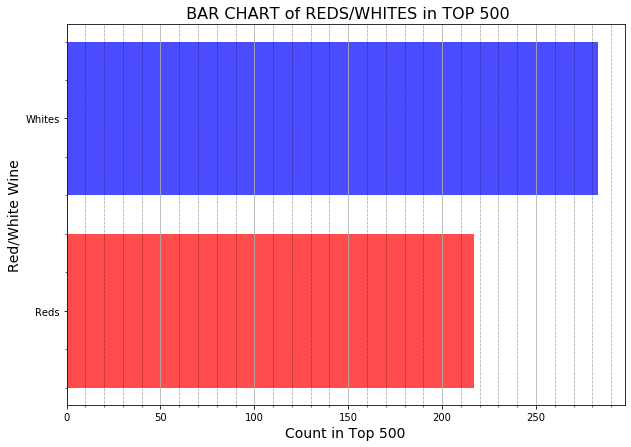

[1599, 4898]


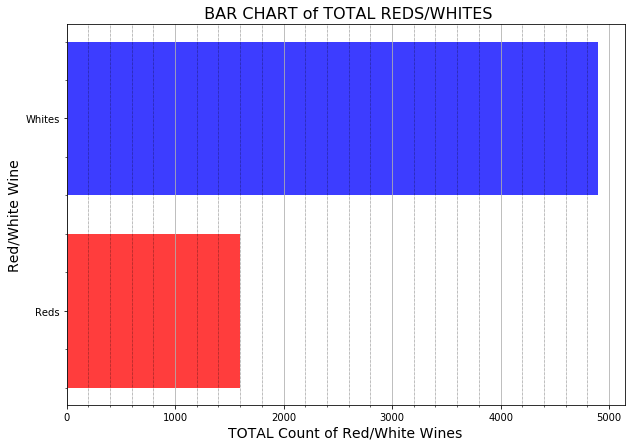

In [881]:
# Take all Reds and Whites and pick the top 500 wines and determine 
# the % of reds and whites in the top 500.(After Quality, FA has priority)

# FA, VA, CA, RS, C, FSO2, TSO2, D, PH, SO4, A, Q, N

from operator import itemgetter

#winels = sorted(winel, key=itemgetter(11))

def get_top_500(lst, index):
    tmp_lst_sorted_by_index = sorted(winel, key=itemgetter(index), reverse=True)
    Q_top500 = []
    count = 0
    short_list = []
    for line in tmp_lst_sorted_by_index:
        tmp_lst = line
        Qtmp = tmp_lst[11]
        Ntmp = tmp_lst[12]
        tmp_lst = [Qtmp, Ntmp]
        Q_top500.append(tmp_lst)
        count += 1
        if count == 500:
            return Q_top500

def sort_500(lst_500):
    r = []
    w = []
    for l in lst_500:
        if "RW" in l[1]:
            r.append(l)
        if "WW" in l[1]:
            w.append(l)
    print("Number of Reds in top 500 by Quality rating =", len(r))
    print("Number of Whites in top 500 by Quality rating =", len(w))
    return r, w

top_500 = get_top_500(winel, 11)
r500, w500 = sort_500(top_500)

t_500 = [len(r500), len(w500)]
print(t_500)
nam = ["Reds", "Whites"]

############### BELOW PLOTS REDS and WHITES IN TOP 500 ##########

my_colors = 'rb'
fig, ax = plt.subplots(figsize=(10,7))
plt.title(" BAR CHART of REDS/WHITES in TOP 500", fontsize=16)
plt.xlabel("Count in Top 500", fontsize=14)
plt.ylabel("Red/White Wine", fontsize=14)
ax.barh(nam, t_500, color = my_colors, alpha=0.7)
ax.grid(axis='x')
ax.minorticks_on()
ax.grid(axis='x', which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()
plt.close()

############### BELOW PLOTS TOTAL REDS and WHITES ##########

tot_rw = [len(rw), len(ww)]
print(tot_rw)
nam = ["Reds", "Whites"]
my_colors = 'rb'
fig, ax = plt.subplots(figsize=(10,7))
plt.title(" BAR CHART of TOTAL REDS/WHITES", fontsize=16)
plt.xlabel("TOTAL Count of Red/White Wines", fontsize=14)
plt.ylabel("Red/White Wine", fontsize=14)
ax.barh(nam, tot_rw, color = my_colors, alpha=0.76)
ax.grid(axis='x')
ax.minorticks_on()
ax.grid(axis='x', which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()
plt.close()


## Step 9:  Pie Chart: Percentage of RED Wines by QUALITY

rdata_pie = [[3, 0.63], [4, 3.31], [5, 42.59], [6, 39.9], [7, 12.45], [8, 1.13]]
rexplode_list = [0, 0, 0.1, 0, 0, 0]


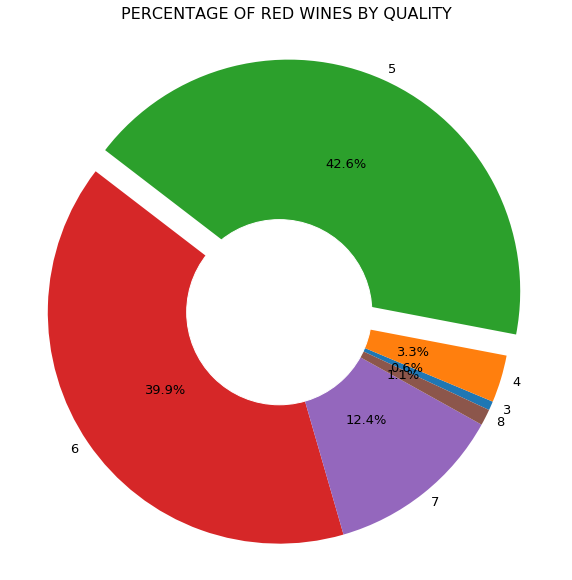

data_pie = [[3, 0.41], [4, 3.33], [5, 29.75], [6, 44.88], [7, 17.97], [8, 3.57], [9, 0.1]]
explode_list = [0, 0, 0, 0.1, 0, 0, 0]


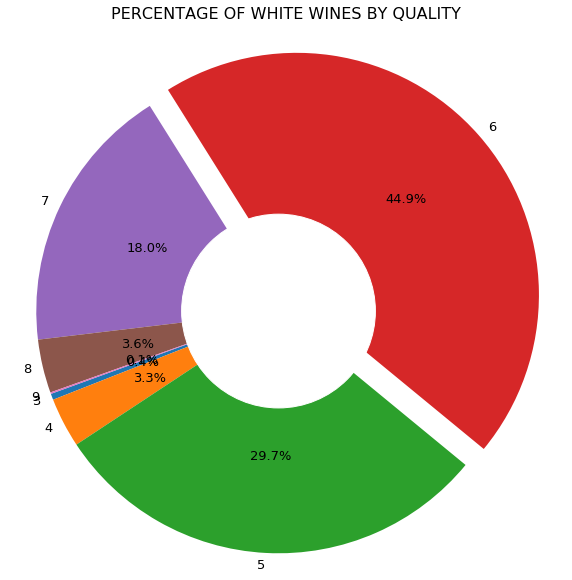

In [905]:
q_cnt = [1,2,3,4,5,6,7,8,9,10]
rwQ = make_list(rw, 11)
rwQltyCnt = get_count(rwQ)
wwQ = make_list(ww, 11)
wwQltyCnt = get_count(wwQ)
#print(q_cnt, rwQltyCnt)

def get_explode_list(plist):
    dlist = plist
    m = max(plist, key=lambda x: x[1])
    n = m[0]
    elist = []
    for i in range(len(dlist)):
        if(dlist[i][0] == n):
            elist.append(0.1)
        else:
            elist.append(0)
    return elist

def get_percent_dict(bin_list, count_list):
    Tot = sum(count_list)
#    per_list = []
    pie_list =[]
    t = []
    for i in range(len(count_list)):
        percent =  ( round (( (count_list[i]/Tot ) * 100), 2) )
        if percent == 0.0:
            pass
        else:
            t = [ (i+1), percent ]
            pie_list.append(t)
#    print("pie_list =", pie_list)
    return pie_list

########### % of RED WINES BY QUALITY ##############

rdata_pie = get_percent_dict(q_cnt, rwQltyCnt)
rexplode_list = get_explode_list(rdata_pie)
print("rdata_pie =", rdata_pie)
print("rexplode_list =", rexplode_list)

my_labels =['One', 'Two', 'Three', 'Four', 'Five', 'Six', 'Seven', 'Eight', 'Nine', 'Ten']

fig, ax1 = plt.subplots(figsize=(10,10))
ax1.set_title("PERCENTAGE OF RED WINES BY QUALITY", fontsize = 16, pad = 10)
ax1.pie([x[1] for x in rdata_pie], labels=[y[0] for y in rdata_pie], explode=rexplode_list, autopct='%1.1f%%',startangle=335, labeldistance = 1.05, textprops={'fontsize': 13})
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
#ax1.legend([x[1] for x in data_pie], labels, loc='lower left', bbox_to_anchor=(-0.1, 1.), fontsize=8)
my_circle=plt.Circle( (0,0), 0.4, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.show()
plt.close()

########### % of WHITE WINES BY QUALITY ##############

wdata_pie = get_percent_dict(q_cnt, wwQltyCnt)
wexplode_list = get_explode_list(wdata_pie)
print("data_pie =", wdata_pie)
print("explode_list =", wexplode_list)

my_labels =['One', 'Two', 'Three', 'Four', 'Five', 'Six', 'Seven', 'Eight', 'Nine', 'Ten']

fig, ax1 = plt.subplots(figsize=(10,10))
ax1.set_title("PERCENTAGE OF WHITE WINES BY QUALITY", fontsize = 16, pad = 10)
ax1.pie([x[1] for x in wdata_pie], labels=[y[0] for y in wdata_pie], explode=wexplode_list, autopct='%1.1f%%',startangle=200, labeldistance = 1.05, textprops={'fontsize': 13})
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
#ax1.legend([x[1] for x in data_pie], labels, loc='lower left', bbox_to_anchor=(-0.1, 1.), fontsize=8)
my_circle=plt.Circle( (0,0), 0.4, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.show()
plt.close()

## Step 10:  Mean, Median, Mode of a Column

In [760]:
# FA, VA, CA, RS, C, FSO2, TSO2, D, PH, SO4, A, Q, N
#print(rwQ)

def get_mean(t):
    x = []
    Tot = 0
    length = len(t)
    for i in range(len(t)):
        x.append(int(t[i]))
        Tot = sum(x)
    Men = round(Tot/length, 4)
#    print("Total =", Tot, "length =", length, "Mean =", Men)
    return Men, x

def get_median(s):
    Median = 0.0
#    lengthDiv2 = 0
    s_sorted = sorted(s)
    length = len(s)
    lengthDiv2 = length // 2
    if ( (length % 2) == 1 ):                  # Implies length is ODD, so Median is the middle number
        print("List has Odd count, so Median is the middle number")
        Median = int(s_sorted[lengthDiv2])
    elif ( (length % 2) == 0 ):            # Implies length is EVEN, so Median is average of middle TWO numbers
        print("List has Even count, so Median is the average of middle TWO numbers", '\n')
        Median = ( int(s_sorted[lengthDiv2]) + int(s_sorted[lengthDiv2-1]) ) / 2
    return Median

def get_mode(u):
    from collections import Counter
    commondata = Counter(u)
    mostcommon = commondata.most_common()
    mostcommon_1 = commondata.most_common(1)
    Mode = mostcommon_1
    return Mode

def get_stdev(wlist, Me):
    from math import sqrt
    list_deviations = []
    head = []
    head = wlist.pop(0)
    for kk in range(len(wlist)):
        deviation = float(wlist[kk]) - Me
        deviation_sq = deviation * deviation
        list_deviations.append(deviation_sq)
    sum_list_deviations = sum(list_deviations)
    len_list = len(wlist)
    stdDev = round( sqrt(sum_list_deviations/(len_list-1)), 4)
    return stdDev

# EVALUATE MEAN, MEDIAN, MODE FOR RED WINES
# To evaluate a different column or wine, ONLY CHANGE below 2 lines
# WineType = 'rw'
# Column = 'Q'
# dat = WineType + Column
# print(dat)

print('\n', "MY RESULTS FOR REDS AND WHITES:", '\n')

rMean, int_rwQ = get_mean(rwQ)
rMedian = get_median(rwQ)
rMode = get_mode(rwQ)
rStdDev = get_stdev(rwQ, rMean)
print("MEAN = ", rMean)
print("MEDIAN =", rMedian)
print("MODE =", rMode)
print("1-SIGMA =", rStdDev)

wMean, int_wwQ = get_mean(wwQ)
wMedian = get_median(wwQ)
wMode = get_mode(wwQ)
wStdDev = get_stdev(wwQ, wMean)
print("MEAN = ", wMean)
print("MEDIAN =", wMedian)
print("MODE =", wMode)
print("1-SIGMA =", wStdDev)

################# STATS

rMean_Stats = stats.mean(int_rwQ)
rMedian_Stats = stats.median(int_rwQ)
rMode_Stats = stats.mode(int_rwQ)
rStdev_Stats = stats.stdev(int_rwQ)
print('\n', "RESULTS WITH STATS MODULE FOR REDs AND WHITEs", '\n')
print("rMean_Stats =", round(rMean_Stats,2))
print("rMedian_Stats =", round(rMedian_Stats,2))
print("rMode_Stats =", round(rMode_Stats,2))
print("rStdev_Stats =", round(rStdev_Stats,2))

wMean_Stats = stats.mean(int_wwQ)
wMedian_Stats = stats.median(int_wwQ)
wMode_Stats = stats.mode(int_wwQ)
wStdev_Stats = stats.stdev(int_wwQ)
print("wMean_Stats =", round(wMean_Stats,2))
print("wMedian_Stats =", round(wMedian_Stats,2))
print("wMode_Stats =", round(wMode_Stats,2))
print("wStdev_Stats =", round(wStdev_Stats,2))



 MY RESULTS FOR REDS AND WHITES: 

List has Odd count, so Median is the middle number
MEAN =  5.6368
MEDIAN = 6
MODE = [('5', 679)]
1-SIGMA = 0.8079
List has Odd count, so Median is the middle number
MEAN =  5.8779
MEDIAN = 6
MODE = [('6', 2197)]
1-SIGMA = 0.8858

 RESULTS WITH STATS MODULE FOR REDs AND WHITEs 

rMean_Stats = 5.64
rMedian_Stats = 6
rMode_Stats = 5
rStdev_Stats = 0.81
wMean_Stats = 5.88
wMedian_Stats = 6
wMode_Stats = 6
wStdev_Stats = 0.89



## Step 11:  Frequency Distribution of  Wine Quality
## Plot 1/2/3 - Sigma Lines on a Bar Chart


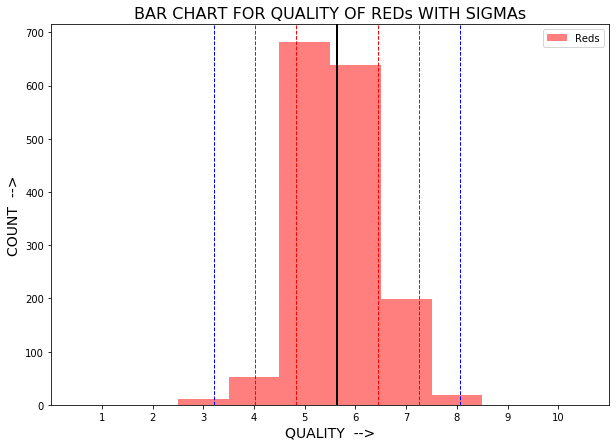

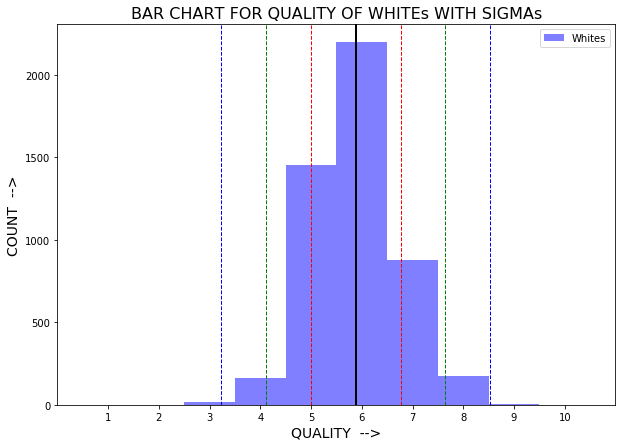

In [719]:
# FA, VA, CA, RS, C, FSO2, TSO2, D, PH, SO4, A, Q, N

x1, y1 = q_cnt, rwQltyCnt
x2, y2 = x1, wwQltyCnt

fig, ax = plt.subplots(figsize=(10,7))
ax.bar(x1, y1, color='r', alpha=0.5, label = 'Reds', width = 1.0) # takes a list
# ax.bar(x2, y2, color='b', alpha=0.5, width=0.5, label='Whites') # takes a list
ax.set_xticklabels(q_cnt)
ax.set_xticks(q_cnt)

plt.title("BAR CHART FOR QUALITY OF REDs WITH SIGMAs", fontsize = 16, color='k')
plt.xlabel("QUALITY  -->", fontsize = 14, color='k')
plt.ylabel("COUNT  -->", fontsize = 14, color='k')

plt.axvline(rMean_Stats+rStdev_Stats, color='red', linestyle='dashed', linewidth=1)
plt.axvline(rMean_Stats-rStdev_Stats, color='red', linestyle='dashed', linewidth=1)
plt.axvline(rMean_Stats+rStdev_Stats*2, color='green', linestyle='dashed', linewidth=1)
plt.axvline(rMean_Stats-rStdev_Stats*2, color='green', linestyle='dashed', linewidth=1)
plt.axvline(rMean_Stats+rStdev_Stats*3, color='b', linestyle='dashed', linewidth=1)
plt.axvline(rMean_Stats-rStdev_Stats*3, color='b', linestyle='dashed', linewidth=1)
plt.axvline(rMean_Stats, color='k', linestyle='solid', linewidth=2)

plt.legend()
plt.show()
plt.close()

fig, ax = plt.subplots(figsize=(10,7))
ax.bar(x2, y2, color='b', alpha=0.5, label = 'Whites', width = 1.0) # takes a list
# ax.bar(x2, y2, color='b', alpha=0.5, width=0.5, label='Whites') # takes a list
ax.set_xticklabels(q_cnt)
ax.set_xticks(q_cnt)

plt.title("BAR CHART FOR QUALITY OF WHITEs WITH SIGMAs", fontsize = 16, color='k')
plt.xlabel("QUALITY  -->", fontsize = 14, color='k')
plt.ylabel("COUNT  -->", fontsize = 14, color='k')

plt.axvline(wMean_Stats+wStdev_Stats, color='red', linestyle='dashed', linewidth=1)
plt.axvline(wMean_Stats-wStdev_Stats, color='red', linestyle='dashed', linewidth=1)
plt.axvline(wMean_Stats+wStdev_Stats*2, color='green', linestyle='dashed', linewidth=1)
plt.axvline(wMean_Stats-wStdev_Stats*2, color='green', linestyle='dashed', linewidth=1)
plt.axvline(wMean_Stats+wStdev_Stats*3, color='b', linestyle='dashed', linewidth=1)
plt.axvline(wMean_Stats-wStdev_Stats*3, color='b', linestyle='dashed', linewidth=1)
plt.axvline(wMean_Stats, color='k', linestyle='solid', linewidth=2)

plt.legend()
plt.show()
plt.close()


## Step 12:  Sampling Quality of Wines and Plotting Mean/1-Sigma


In [834]:
Sample_1K = 1000
Sample_500 = 500
Sample_100 = 100
Sample_10 = 10

r_S_1K  = random.sample(rwQ, Sample_1K)
w_S_1K  = random.sample(wwQ, Sample_1K)
r_S_500 = random.sample(rwQ, Sample_500)
w_S_500 = random.sample(wwQ, Sample_500)
r_S_100 = random.sample(rwQ, Sample_100)
w_S_100 = random.sample(wwQ, Sample_100)
r_S_10  = random.sample(rwQ, Sample_10)
w_S_10  = random.sample(wwQ, Sample_10)

print(len(r_S_1K), len(w_S_1K), len(r_S_500), len(w_S_500), len(r_S_100), len(w_S_100), len(r_S_10), len(w_S_10))

################### S = 1000 ################
######## S = 1000, MEAN/STDDEV WITH MY FUNCTION ###########

rMean_1K, int_r_S_1K = get_mean(r_S_1K)
rMedian_1K           = get_median(r_S_1K)
rMode_1K             = get_mode(r_S_1K)
rStdDev_1K           = get_stdev(r_S_1K, rMean_1K)
print("SAMPLE SIZE = 1000, STATISTICAL PARAMETERS FOR REDs and WHITEs")
print('\n', "RESULTS WITH MY FUNCTION", '\n')
print("MEAN FOR REDs WITH 1K SAMPLE SIZE    =",   rMean_1K)
print("MEDIAN FOR REDs WITH 1K SAMPLE SIZE  =",  rMedian_1K)
print("MODE FOR REDs WITH 1K SAMPLE SIZE    =",    rMode_1K)
print("1-SIGMA FOR REDs WITH 1K SAMPLE SIZE =", rStdDev_1K)

wMean_1K, int_w_S_1K = get_mean(w_S_1K)
wMedian_1K           = get_median(w_S_1K)
wMode_1K             = get_mode(w_S_1K)
wStdDev_1K           = get_stdev(w_S_1K, wMean_1K)
print("MEAN FOR WHITEs WITH 1K SAMPLE SIZE    =",   wMean_1K)
print("MEDIAN FOR WHITEs WITH 1K SAMPLE SIZE  =",  wMedian_1K)
print("MODE FOR WHITEs WITH 1K SAMPLE SIZE    =",    wMode_1K)
print("1-SIGMA FOR WHITEs WITH 1K SAMPLE SIZE =", wStdDev_1K)
######## S = 1000, MEAN/STDDEV WITH STATS FUNCTION ###########

rMean_Stats_1K   = stats.mean(int_r_S_1K)
rMedian_Stats_1K = stats.median(int_r_S_1K)
rMode_Stats_1K   = stats.mode(int_r_S_1K)
rStdev_Stats_1K  = stats.stdev(int_r_S_1K)
print('\n', "RESULTS WITH STATS MODULE", '\n')
print("rMean_Stats FOR REDs WITH 1K SAMPLE SIZE   =",   round(rMean_Stats_1K,2))
print("rMedian_Stats FOR REDs WITH 1K SAMPLE SIZE =", round(rMedian_Stats_1K,2))
print("rMode_Stats FOR REDs WITH 1K SAMPLE SIZE   =",   round(rMode_Stats_1K,2))
print("rStdev_Stats FOR REDs WITH 1K SAMPLE SIZE  =",  round(rStdev_Stats_1K,2))

wMean_Stats_1K   = stats.mean(int_w_S_1K)
wMedian_Stats_1K = stats.median(int_w_S_1K)
wMode_Stats_1K   = stats.mode(int_w_S_1K)
wStdev_Stats_1K  = stats.stdev(int_w_S_1K)
print("wMean_Stats FOR WHITEs WITH 1K SAMPLE SIZE   =",   round(wMean_Stats_1K,2))
print("wMedian_Stats FOR WHITEs WITH 1K SAMPLE SIZE =", round(wMedian_Stats_1K,2))
print("wMode_Stats FOR WHITEs WITH 1K SAMPLE SIZE   =",   round(wMode_Stats_1K,2))
print("wStdev_Stats FOR WHITEs WITH 1K SAMPLE SIZE  =",  round(wStdev_Stats_1K,2))

################### S = 500 ################
######## S = 500, MEAN/STDDEV WITH MY FUNCTION ###########

rMean_500, int_r_S_500 = get_mean(r_S_500)
rMedian_500            = get_median(r_S_500)
rMode_500              = get_mode(r_S_500)
rStdDev_500            = get_stdev(r_S_500, rMean_500)
print("SAMPLE SIZE = 500, STATISTICAL PARAMETERS FOR REDs and WHITEs")
print('\n', "RESULTS WITH MY FUNCTION", '\n')
print("MEAN FOR REDs WITH SAMPLE SIZE OF 100    = ",   rMean_500)
print("MEDIAN FOR REDs WITH SAMPLE SIZE OF 100  =",  rMedian_500)
print("MODE FOR REDs WITH SAMPLE SIZE OF 100    =",    rMode_500)
print("1-SIGMA FOR REDs WITH SAMPLE SIZE OF 100 =", rStdDev_500)

wMean_500, int_w_S_500 = get_mean(w_S_500)
wMedian_500            = get_median(w_S_500)
wMode_500              = get_mode(w_S_500)
wStdDev_500            = get_stdev(w_S_500, wMean_500)
print("MEAN FOR WHITEs WITH SAMPLE SIZE OF 500    = ",   wMean_500)
print("MEDIAN FOR WHITEs WITH SAMPLE SIZE OF 500  =",  wMedian_500)
print("MODE FOR WHITEs WITH SAMPLE SIZE OF 500    =",    wMode_500)
print("1-SIGMA FOR WHITEs WITH SAMPLE SIZE OF 500 =", wStdDev_500)
######## S = 500, MEAN/STDDEV WITH STATS FUNCTION ###########

rMean_Stats_500   = stats.mean(int_r_S_500)
rMedian_Stats_500 = stats.median(int_r_S_500)
rMode_Stats_500   = stats.mode(int_r_S_500)
rStdev_Stats_500  = stats.stdev(int_r_S_500)
print('\n', "RESULTS WITH STATS MODULE", '\n')
print("rMean_Stats FOR REDs WITH SAMPLE SIZE OF 500   =",   round(rMean_Stats_500,2))
print("rMedian_Stats FOR REDs WITH SAMPLE SIZE OF 500 =", round(rMedian_Stats_500,2))
print("rMode_Stats FOR REDs WITH SAMPLE SIZE OF 500   =",   round(rMode_Stats_500,2))
print("rStdev_Stats FOR REDs WITH SAMPLE SIZE OF 500  =",  round(rStdev_Stats_500,2))

wMean_Stats_500   = stats.mean(int_w_S_500)
wMedian_Stats_500 = stats.median(int_w_S_500)
wMode_Stats_500   = stats.mode(int_w_S_500)
wStdev_Stats_500  = stats.stdev(int_w_S_500)
print("wMean_Stats FOR WHITEs WITH SAMPLE SIZE OF 500   =",   round(wMean_Stats_500,2))
print("wMedian_Stats FOR WHITEs WITH SAMPLE SIZE OF 500 =", round(wMedian_Stats_500,2))
print("wMode_Stats FOR WHITEs WITH SAMPLE SIZE OF 500   =",   round(wMode_Stats_500,2))
print("wStdev_Stats FOR WHITEs WITH SAMPLE SIZE OF 500  =",  round(wStdev_Stats_500,2))

################### S = 100 ################
######## S = 100, MEAN/STDDEV WITH MY FUNCTION ###########

rMean_100, int_r_S_100 = get_mean(r_S_100)
rMedian_100            = get_median(r_S_100)
rMode_100              = get_mode(r_S_100)
rStdDev_100            = get_stdev(r_S_100, rMean_100)
print("SAMPLE SIZE = 100, STATISTICAL PARAMETERS FOR REDs and WHITEs")
print('\n', "RESULTS WITH MY FUNCTION", '\n')
print("MEAN FOR REDs WITH SAMPLE SIZE OF 100    = ",   rMean_100)
print("MEDIAN FOR REDs WITH SAMPLE SIZE OF 100  =",  rMedian_100)
print("MODE FOR REDs WITH SAMPLE SIZE OF 100    =",    rMode_100)
print("1-SIGMA FOR REDs WITH SAMPLE SIZE OF 100 =", rStdDev_100)

wMean_100, int_w_S_100 = get_mean(w_S_100)
wMedian_100            = get_median(w_S_100)
wMode_100              = get_mode(w_S_100)
wStdDev_100            = get_stdev(w_S_100, wMean_100)
print("MEAN FOR WHITEs WITH SAMPLE SIZE OF 100    = ",   wMean_100)
print("MEDIAN FOR WHITEs WITH SAMPLE SIZE OF 100  =",  wMedian_100)
print("MODE FOR WHITEs WITH SAMPLE SIZE OF 100    =",    wMode_100)
print("1-SIGMA FOR WHITEs WITH SAMPLE SIZE OF 100 =", wStdDev_100)
######## S = 100, MEAN/STDDEV WITH STATS FUNCTION ###########

rMean_Stats_100   = stats.mean(int_r_S_100)
rMedian_Stats_100 = stats.median(int_r_S_100)
rMode_Stats_100   = stats.mode(int_r_S_100)
rStdev_Stats_100  = stats.stdev(int_r_S_100)
print('\n', "RESULTS WITH STATS MODULE", '\n')
print("rMean_Stats FOR REDs WITH SAMPLE SIZE OF 100   =",   round(rMean_Stats_100,2))
print("rMedian_Stats FOR REDs WITH SAMPLE SIZE OF 100 =", round(rMedian_Stats_100,2))
print("rMode_Stats FOR REDs WITH SAMPLE SIZE OF 100   =",   round(rMode_Stats_100,2))
print("rStdev_Stats FOR REDs WITH SAMPLE SIZE OF 100  =",  round(rStdev_Stats_100,2))

wMean_Stats_100   = stats.mean(int_w_S_100)
wMedian_Stats_100 = stats.median(int_w_S_100)
wMode_Stats_100   = stats.mode(int_w_S_100)
wStdev_Stats_100  = stats.stdev(int_w_S_100)
print("wMean_Stats FOR WHITEs WITH SAMPLE SIZE OF 100   =",   round(wMean_Stats_100,2))
print("wMedian_Stats FOR WHITEs WITH SAMPLE SIZE OF 100 =", round(wMedian_Stats_100,2))
print("wMode_Stats FOR WHITEs WITH SAMPLE SIZE OF 100   =",   round(wMode_Stats_100,2))
print("wStdev_Stats FOR WHITEs WITH SAMPLE SIZE OF 100  =",  round(wStdev_Stats_100,2))

################### S = 10 ################
######## S = 10, MEAN/STDDEV WITH MY FUNCTION ###########

rMean_10, int_r_S_10 = get_mean(r_S_10)
rMedian_10            = get_median(r_S_10)
rMode_10              = get_mode(r_S_10)
rStdDev_10            = get_stdev(r_S_10, rMean_10)
print("SAMPLE SIZE = 10, STATISTICAL PARAMETERS FOR REDs and WHITEs")
print('\n', "RESULTS WITH MY FUNCTION", '\n')
print("MEAN FOR REDs WITH SAMPLE SIZE OF 10    = ",   rMean_10)
print("MEDIAN FOR REDs WITH SAMPLE SIZE OF 10  =",  rMedian_10)
print("MODE FOR REDs WITH SAMPLE SIZE OF 10    =",    rMode_10)
print("1-SIGMA FOR REDs WITH SAMPLE SIZE OF 10 =", rStdDev_10)

wMean_10, int_w_S_10 = get_mean(w_S_10)
wMedian_10            = get_median(w_S_10)
wMode_10              = get_mode(w_S_10)
wStdDev_10            = get_stdev(w_S_10, wMean_10)
print("MEAN FOR WHITEs WITH SAMPLE SIZE OF 10    = ",   wMean_10)
print("MEDIAN FOR WHITEs WITH SAMPLE SIZE OF 10  =",  wMedian_10)
print("MODE FOR WHITEs WITH SAMPLE SIZE OF 10    =",    wMode_10)
print("1-SIGMA FOR WHITEs WITH SAMPLE SIZE OF 10 =", wStdDev_10)
######## S = 100, MEAN/STDDEV WITH STATS FUNCTION ###########

rMean_Stats_10   = stats.mean(int_r_S_10)
rMedian_Stats_10 = stats.median(int_r_S_10)
rMode_Stats_10   = stats.mode(int_r_S_10)
rStdev_Stats_10  = stats.stdev(int_r_S_10)
print('\n', "RESULTS WITH STATS MODULE", '\n')
print("rMean_Stats FOR REDs WITH SAMPLE SIZE OF 10   =",   round(rMean_Stats_10,2))
print("rMedian_Stats FOR REDs WITH SAMPLE SIZE OF 10 =", round(rMedian_Stats_10,2))
print("rMode_Stats FOR REDs WITH SAMPLE SIZE OF 10   =",   round(rMode_Stats_10,2))
print("rStdev_Stats FOR REDs WITH SAMPLE SIZE OF 10  =",  round(rStdev_Stats_10,2))

wMean_Stats_10   = stats.mean(int_w_S_10)
wMedian_Stats_10 = stats.median(int_w_S_10)
wMode_Stats_10   = stats.mode(int_w_S_10)
wStdev_Stats_10  = stats.stdev(int_w_S_10)
print("wMean_Stats FOR WHITEs WITH SAMPLE SIZE OF 10   =",   round(wMean_Stats_10,2))
print("wMedian_Stats FOR WHITEs WITH SAMPLE SIZE OF 10 =", round(wMedian_Stats_10,2))
print("wMode_Stats FOR WHITEs WITH SAMPLE SIZE OF 10   =",   round(wMode_Stats_10,2))
print("wStdev_Stats FOR WHITEs WITH SAMPLE SIZE OF 10  =",  round(wStdev_Stats_10,2))

1000 1000 500 500 100 100 10 10
List has Even count, so Median is the average of middle TWO numbers 

SAMPLE SIZE = 1000, STATISTICAL PARAMETERS FOR REDs and WHITEs

 RESULTS WITH MY FUNCTION 

MEAN FOR REDs WITH 1K SAMPLE SIZE    = 5.645
MEDIAN FOR REDs WITH 1K SAMPLE SIZE  = 6.0
MODE FOR REDs WITH 1K SAMPLE SIZE    = [('5', 409)]
1-SIGMA FOR REDs WITH 1K SAMPLE SIZE = 0.8174
List has Even count, so Median is the average of middle TWO numbers 

MEAN FOR WHITEs WITH 1K SAMPLE SIZE    = 5.89
MEDIAN FOR WHITEs WITH 1K SAMPLE SIZE  = 6.0
MODE FOR WHITEs WITH 1K SAMPLE SIZE    = [('6', 462)]
1-SIGMA FOR WHITEs WITH 1K SAMPLE SIZE = 0.8824

 RESULTS WITH STATS MODULE 

rMean_Stats FOR REDs WITH 1K SAMPLE SIZE   = 5.64
rMedian_Stats FOR REDs WITH 1K SAMPLE SIZE = 6.0
rMode_Stats FOR REDs WITH 1K SAMPLE SIZE   = 5
rStdev_Stats FOR REDs WITH 1K SAMPLE SIZE  = 0.82
wMean_Stats FOR WHITEs WITH 1K SAMPLE SIZE   = 5.89
wMedian_Stats FOR WHITEs WITH 1K SAMPLE SIZE = 6.0
wMode_Stats FOR WHITEs WITH 

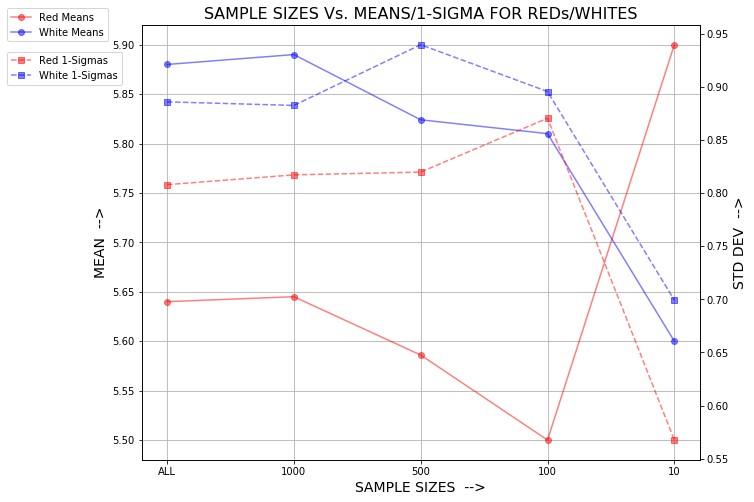

In [835]:
# Plot Means and Standard Deviations for Various Sample Sizes
rmeans = [round(rMean_Stats,2), rMean_1K, rMean_500, rMean_100, rMean_10]
wmeans = [round(wMean_Stats,2), wMean_1K, wMean_500, wMean_100, wMean_10]
rstdev = [rStdDev, rStdev_Stats_1K, rStdev_Stats_500, rStdev_Stats_100, rStdev_Stats_10]
wstdev = [wStdDev, wStdev_Stats_1K, wStdev_Stats_500, wStdev_Stats_100, wStdev_Stats_10]
rmed = [rMedian, rMedian_1K, rMedian_500, rMedian_100, rMedian_10]
wmed = [wMedian, wMedian_1K, wMedian_500, wMedian_100, wMedian_10]

my_labels = ["ALL", "1000", "500", "100", "10"]

fig, ax1 = plt.subplots(figsize=(10,8))
ax2 = ax1.twinx()

plt.title("SAMPLE SIZES Vs. MEANS/1-SIGMA FOR REDs/WHITES", fontsize = 16, color='k')
ax1.set_xlabel("SAMPLE SIZES  -->", fontsize = 14, color ='k')
ax1.set_ylabel("MEAN  -->", fontsize = 14, color ='k')
ax2.set_ylabel('STD DEV  -->', fontsize=14, color='k')

ax1.plot(my_labels, rmeans, 'ro-', label='Red Means', alpha=0.5)
ax1.plot(my_labels, wmeans,'bo-', label= 'White Means', alpha=0.5)

ax2.plot(my_labels, rstdev, 'rs--', label='Red 1-Sigmas', alpha=0.5)
ax2.plot(my_labels, wstdev,'bs--', label= 'White 1-Sigmas', alpha=0.5)

# ax1.plot(my_labels, rmeans, 'ro', label='Red Means', alpha=0.5)
# ax1.plot(my_labels, wmeans,'bo', label= 'White Means', alpha=0.5)

# ax2.plot(my_labels, rstdev, 'rs', label='Red 1-Sigmas', alpha=0.5)
# ax2.plot(my_labels, wstdev,'bs', label= 'White 1-Sigmas', alpha=0.5)

ax1.grid()
ax1.legend(loc= 'center left', bbox_to_anchor=(-0.25, 1))
ax2.legend(loc= 'center left', bbox_to_anchor=(-0.25, 0.9))
plt.show()

# END OF PROJECT WINE
# !!! THANK YOU !!!